# Assignment #1 - The Nile River Basin

Course: Model-based Water Systems Assessment <br>

Course code: TPM802A <br>

Authors: Neeltje A. Augustinus & Milan L. Moleman <br>

Date: 20 Sep 2024 <br>

In this assignment you will provide a report of the Nile basin. The goal is to understand the system’s tradeoffs, its sensitivity to exogenous factors, and identify the key vulnerabilities. You will deliver a report comprised of 4 sections detailed below. 

## Section 1. The Nile River Basin geographical context and topological scheme 

Provide the map generated for In-class exercise # 1. The map must include the watershed boundaries, the tributaries, the boundaries between Ethiopia, Sudan and Egypt, and the four major reservoirs located in the main branch of the Nile, i.e. GERD, Roseires, Sennar and HAD. Further, you also designed a topological representation of the Nile, showing the arrangement of the four reservoirs, the direction of flow, the inflow, and outflow to the major water users and indicated the countries’ boundaries. Place these figures side by side into a single figure and add a descriptive caption about the system. Briefly describe in a paragraph the geopolitical context of the Nile and its shared water resources.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from mpl_toolkits.basemap import Basemap

from IPython.display import Image

In [2]:
fig = plt.figure()
fig.set_size_inches([17.05,8.15])
ax = fig.add_subplot(111)

# plot base map
map = Basemap(llcrnrlon=20,llcrnrlat=0,urcrnrlon=50,urcrnrlat=35, resolution='h') 
map.arcgisimage(server="https://server.arcgisonline.com/ARCGIS/", service="Ocean/World_Ocean_Base") 
map.fillcontinents(color='None', lake_color='dodgerblue')
map.drawrivers(color='dodgerblue',linewidth=1.0,zorder=1)
map.drawcountries(color='k',linewidth=1.25)
map.readshapefile('data/Aqueduct_river_basins_NILE', 'Basin', drawbounds=False)
patches = []
for info, shape in zip(map.Basin_info, map.Basin):      
    patches.append(Polygon(np.array(shape)))
ax.add_collection(PatchCollection(patches, facecolor='0.33', edgecolor='0.5', alpha=0.6))

# plot dams
dams_names=['HAD', 'GERD', 'Sennar', 'Roseires']
dams_longitude = [32.87778,35.0535,33.3800,34.2315]
dams_latitude = [23.97056,11.1255,13.3200,11.4753]
x, y = map(dams_longitude, dams_latitude)
map.scatter(x, y, c='dodgerblue', s=150, marker='^')
    
# label reservoirs 
for dam in range(len(dams_names)):
    if dams_names[dam] == 'GERD': 
        plt.text((dams_longitude[dam] + 0.7),(dams_latitude[dam]-0.40), dams_names[dam], fontsize=7, ha='left',va='bottom',color='k')
    else: 
        plt.text((dams_longitude[dam] + 0.50),dams_latitude[dam], dams_names[dam], fontsize=7, ha='left',va='bottom',color='k')

# label countries
country_name=['Egypt','Sudan','Ethiopia']
country_longitude=[30, 30, 40]
country_latitude=[25, 15, 7]

for country in range(len(country_name)):
  plt.text(country_longitude[country], country_latitude[country], country_name[country],fontsize=10, ha='center',va='center',color='k')

# save the figure in png format
fig.set_size_inches([17.05, 8.15])
fig.savefig('images/NileRiverBasinMap.png')
fig.clf()

<Figure size 1705x815 with 0 Axes>

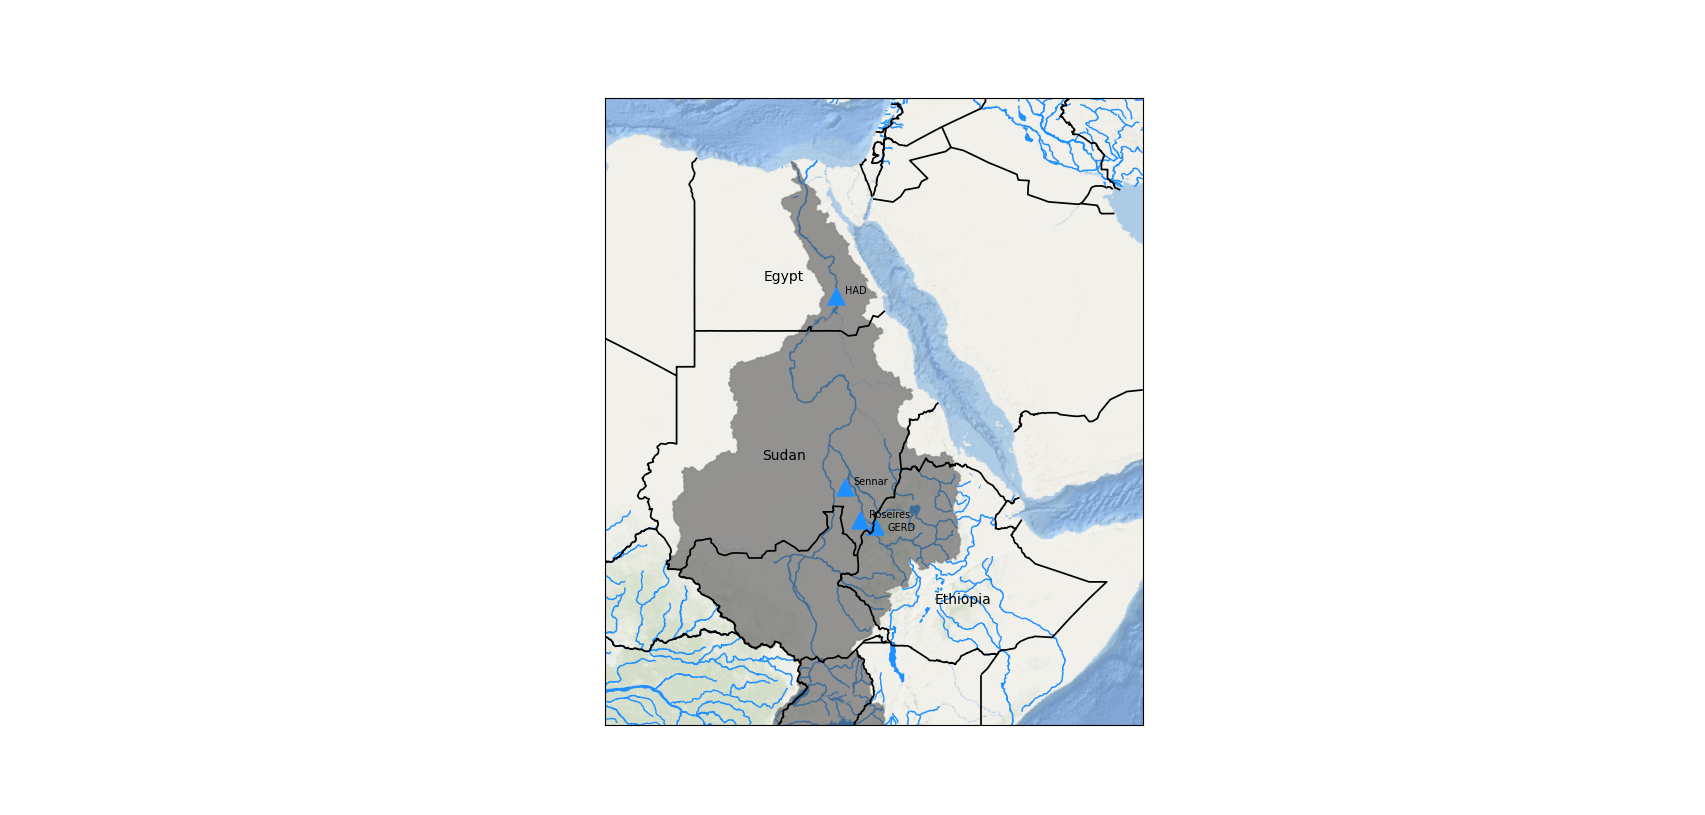

In [3]:
Image(filename='images/NileRiverBasinMap.png')

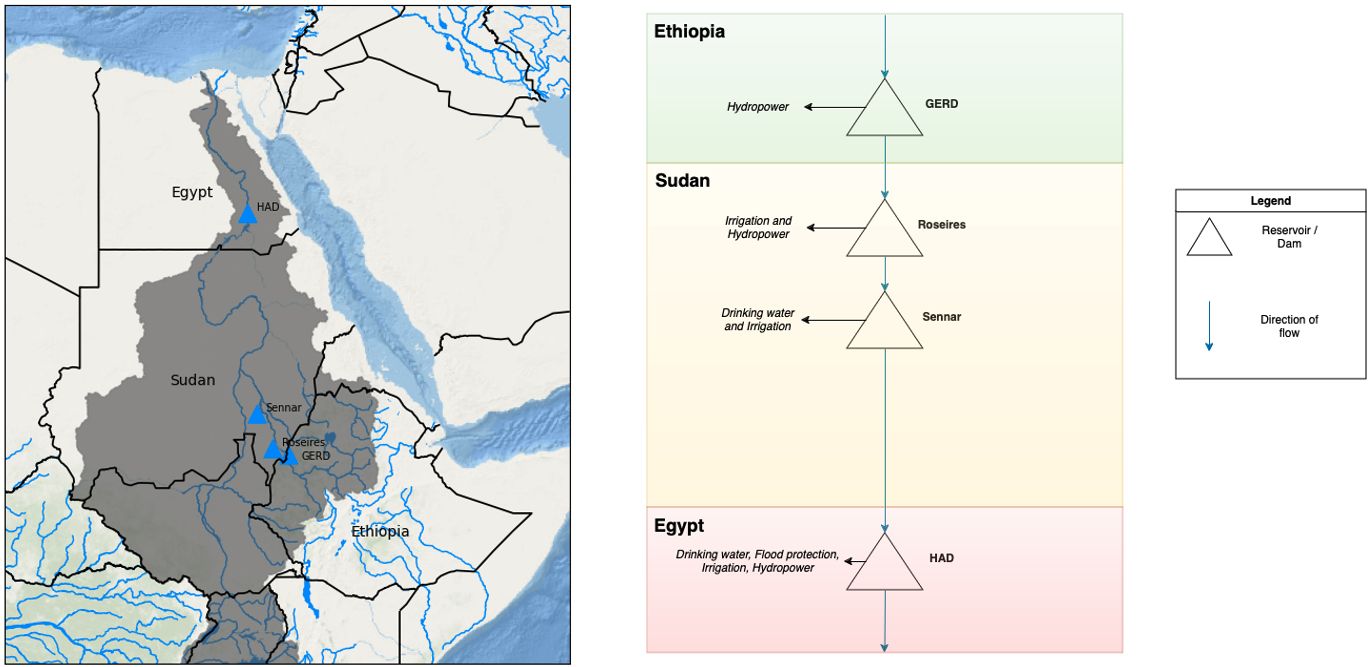

In [4]:
Image(filename='images/NileRiverBasinTotal.png')